# Project: Wrangling and Analyze Data

### Table of Contents
    1. Data Gathering
        i.   Dataset 1 - twitter-archive-enhanced.csv
        ii.  Dataset 2 - image-predictions.tsv
        iii. Dataset 3 - Twitter APIs retweet and favorite counts
    2. Data Assessment
    3. Data Cleaning
    4. Storing Data
    5. Analyzing and Visualizing Data
 

## Data Gathering
In the bellow cells, I have gathered **all** three pieces of data for this project and I have loaded them into this notebook. 


In [1]:
#let us import all the packages needed within the project
import pandas as pd
import os
import re
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt 
import seaborn as sns


1. I have directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. I have used the Requests library to download the tweet image prediction (image_predictions.tsv), and then saved

In [3]:
folder_name = 'image_predictions_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
#then save the file into the new folder

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
df_2 = pd.read_csv(r'image_predictions_folder\image-predictions.tsv', sep='\t')

3. I have used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 484


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 472


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [5]:
df_3 = pd.read_json('tweet_json.txt', lines=True)

In [6]:
df_list = []
count = 0

file_name = 'tweet_json.txt'
with open(file_name, 'r') as file:
    for lines in file:
        count +=1
        json_file = file.readline()
        data = json.loads(lines)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                 'retweet_count': retweet_count,
                  'favorite_count': favorite_count})
        
        t_df = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])

In [7]:
t_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,891815181378084864,3465,21982
2,891327558926688256,7721,35192
3,890971913173991426,1648,10335
4,890609185150312448,3605,24433
...,...,...,...
1159,666057090499244032,112,247
1160,666051853826850816,699,1023
1161,666049248165822465,36,88
1162,666033412701032449,36,100


## Assessing Data
In this section, I have detected and documented **nine quality issues and two tidiness issue**. 




### 1. Twitter-archive-enhanced Dataset Assessing
##### Assessing twitter-archive-enhanced.csv in both visually and programmatically

In [8]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1371,702276748847800320,NaN,NaN,2016-02-23 23:39:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702276748...,11,10,None,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
1476,693629975228977152,NaN,NaN,2016-01-31 03:00:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is afraid of its own feet. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693629975...,12,10,None,None,None,pupper,None
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None


In [12]:
df_1.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [105]:
#the number of duplicates in the entire df_1 dataframe
df_1.duplicated().sum()

0

In [14]:
#the number of null values in the entire df_1 dataframe
df_1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#the number of null values in column expanded_urls
df_1.expanded_urls.isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [16]:
#the number of duplicates in the column of expanded_urls
df_1.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

In [17]:
#let us sort the rating numerator values
df_1.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [18]:
#let us check the distribution of rating_numerators
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
#let us look the number of denominators not equal to ten
no_of_denom = ((df_1.rating_denominator.sort_values() < 10) | (df_1.rating_denominator.sort_values() > 10))
no_of_denom.value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

In [20]:
#let us check the number of dog names that have none names
sum([df_1.name == 'None']).value_counts()

0    1611
1     745
Name: name, dtype: int64

In [21]:
#the number of dog names having a as a name
sum([df_1.name == 'a']).value_counts()

0    2301
1      55
Name: name, dtype: int64

In [22]:
#the number of dog names having an as a name
sum([df_1.name == 'an']).value_counts()

0    2349
1       7
Name: name, dtype: int64

In [23]:
#the number of dog names having the as a name
sum([df_1.name == 'the']).value_counts()

0    2348
1       8
Name: name, dtype: int64

In [24]:
#check this name in the names column, it is invalid name
df_1.loc[df_1['name'] == 'this']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [25]:
#this code assesses the source column which has html tags
pd.set_option('display.max_colwidth', None)
df_1['source']

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [26]:
#the number of web client sources
(df_1['source'] == 'Twitter Web Client').value_counts()

False    2356
Name: source, dtype: int64

In [27]:
#this selects the rating_numerators that are greater than 20
incorrect_numer = df_1.loc[df_1['rating_numerator'] > 20]

In [28]:
pd.set_option('display.max_colwidth', None)
incorrect_numer[['tweet_id','text','rating_numerator']]

,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,838150277551247360,@markhoppus 182/10,182
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


In [29]:
#let us search the incorrect numerators from the text column
incorrectnumerators = incorrect_numer.text.str.extract(r'(\d+/\d+)')
incorrectnumerators

,0
188,420/10
189,666/10
290,182/10
313,960/00
340,75/10
433,84/70
516,24/7
695,75/10
763,27/10
902,165/150


### 2. Image-predictions Dataset Assessment
#####  Assessing  image-predictions.tsv in both visually and programmatically


In [30]:
df_2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
540,676975532580409345,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,0.125547,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
633,680970795137544192,https://pbs.twimg.com/media/CXNLU6wWkAE0OkJ.jpg,1,pug,0.713102,True,whippet,0.057426,True,quilt,0.056018,False
1411,770772759874076672,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1,chow,0.979515,True,golden_retriever,0.010219,True,Pomeranian,0.004606,True
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True


In [34]:
#the number of duplicates in the entire df_2 dataframe
df_2.duplicated().sum()

0

In [35]:
#the number of null values in the entire df_2 dataframe
df_2.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [36]:
df_2.img_num.sort_values()

0       1
1295    1
1294    1
1293    1
1292    1
       ..
1978    4
1496    4
1768    4
1713    4
2040    4
Name: img_num, Length: 2075, dtype: int64

### 3. Tweet_df (t_df) Dataset
##### Assessing  t_df  in both visually and programmatically


In [37]:
df_3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'h

In [38]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [39]:
df_3.favorite_count.value_counts()

0        160
1148       4
371        4
382        3
2927       3
        ... 
7025       1
14937      1
10148      1
12740      1
2285       1
Name: favorite_count, Length: 1968, dtype: int64

In [40]:
t_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,891815181378084864,3465,21982
2,891327558926688256,7721,35192
3,890971913173991426,1648,10335
4,890609185150312448,3605,24433


In [41]:
t_df.sample(10)

,tweet_id,retweet_count,favorite_count
220,817908911860748288,739,4595
465,751456908746354688,920,2996
479,749064354620928000,1401,4490
647,706291001778950144,435,1567
779,686760001961103360,1256,3236
421,761976711479193600,1817,5029
954,673919437611909120,325,1057
1007,671536543010570240,343,1036
623,709198395643068416,589,2262
399,770093767776997377,2802,0


In [42]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1164 non-null   int64
 1   retweet_count   1164 non-null   int64
 2   favorite_count  1164 non-null   int64
dtypes: int64(3)
memory usage: 27.4 KB


In [43]:
t_df.describe()

,tweet_id,retweet_count,favorite_count
count,1.164000e+03,1164.000000,1164.000000
mean,7.418102e+17,2204.670103,6551.118557
std,6.825287e+16,3307.103210,9201.864012
min,6.660209e+17,2.000000,0.000000
25%,6.781969e+17,485.250000,1240.750000
50%,7.180123e+17,1083.500000,3037.500000
75%,7.986513e+17,2610.250000,8229.500000
max,8.924206e+17,34434.000000,80323.000000


In [44]:
t_df.retweet_count.sort_values()

130         2
163         2
526         6
27          8
1155       11
        ...  
302     21882
81      26183
79      26622
259     32237
214     34434
Name: retweet_count, Length: 1164, dtype: int64

In [45]:
t_df.favorite_count.sort_values()

322        0
283        0
277        0
274        0
271        0
       ...  
170    62267
74     66073
38     69069
259    70336
81     80323
Name: favorite_count, Length: 1164, dtype: int64

In [46]:
t_df.retweet_count.max()

34434

In [47]:
t_df.favorite_count.max()

80323

### Quality issues
#### Twitter-archive-enhanced dataset
###### 1. Missing values in these columns. 
               - in_reply_to_status_id 
               - in_reply_to_user_id
               - retweeted_status_id
               - retweeted_status_user_id
               - retweeted_status_timestamp

###### 2. Timestamp has unnecessary +0000 

###### 3. The timestamp has a datatype of object instead of datetime

###### 4. Source columns has html tags

###### 5. Duplicates and Missing values in expanded_urls

###### 6. Rating_numerator is wrong in some of the tweets

###### 7. Wrong denominator, most denominators are supposed to be 10, but there are some denominators greater than 10.

###### 8. Dogs having an invalid names such as a, an, and the

###### 9. Names starting with lower case letters


### Tidiness issues
1.Dog stages are in different columns, since each dog has one stage, we have to combine the dog stages into one column.

2.All three datasets are based on one observational unit


## Cleaning Data
In this section, I have cleaned **all** of the issues that I documented in the assessment. 


In [48]:
# Make copies of original pieces of data
df1_copy = df_1.copy()
df2_copy = df_2.copy()
tdf_copy = t_df.copy()

#### Removing retweets in order to get the original tweets

In [49]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [50]:
#remove retweets that could be occured repeatly as another tweets
df1_copy.drop(df1_copy[df1_copy['retweeted_status_id'].notnull()==True].index, inplace=True)

#Drop 'retweeted_status_id' column because it is not useful
df1_copy = df1_copy.drop(['retweeted_status_id'], axis=1)

In [51]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  doggo                       2175 non-null   object 
 13  floofer                     2175 

### Quality Issues Cleaning

### Issue #1: Missing values in these columns

#### Define: Missing values in these columns. 
               - in_reply_to_status_id 
               - in_reply_to_user_id
               - retweeted_status_user_id
               - retweeted_status_timestamp
               
 These columns contain more than 90% of null values, so it is better to drop, and there is no need in our analysis. 

#### Code

In [53]:
df1_copy = df1_copy.drop(columns =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [58]:
#I have used .shape attribute to check the number of columns remained now, and its only 12 columns.
df1_copy.shape

(2175, 12)

In [59]:
#let us test if they are still there, so they are not here now
df1_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #2: Timestamp has unnecessary +0000 

#### Define: Timestamp column has to be cleaned by removing the unnecessary +0000

#### Code

In [60]:
#in here, I applied strip methond to remove the unnecessary +0000 in timestamp column
df1_copy.timestamp = df1_copy.timestamp.str.rstrip('+0000')

#### Test

In [61]:
df1_copy.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 2175, dtype: object

### Issue #3: The timestamp has a datatype of object instead of datetime

#### Define: changing the data type of timestamp from object to datetime

#### Code

In [62]:
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

#### Test

In [63]:
df1_copy['timestamp'].dtype

dtype('<M8[ns]')

### Issue #4: Source columns has html tags

#### Define: The source column in twitter-archive dataset has html tags which is not required, we only need to know the source device which may become Iphone, web client or others.

#### Code

In [64]:
df1_copy['source'] = df1_copy['source'].str.split(r'<|>').str[2]

#### Test

In [65]:
df1_copy['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2175, dtype: object

In [66]:
#let us check the number of sources those are iPhone 
(df1_copy['source'] == 'Twitter for iPhone').value_counts()

True     2042
False     133
Name: source, dtype: int64

In [67]:
df1_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue #5: Duplicates and Missing values in expanded_urls

#### Define: expanded_urls has a lot duplicates and missing values, so I decided to drop that column since I don't need it for analysis.

#### Code

In [68]:
df1_copy = df1_copy.drop(columns =['expanded_urls'])

#### Test

In [69]:
df1_copy.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


### Issue #6: Wrong rating_numerators

#### Define: Rating_numerator column has invalid numbers in some of the tweets

As I have assessed in the assessment part, there are a lot of rating_numerators that are not supposed to be the number which they are now. for example 666 or 960 numberators is extremely big number.  

#### Code

In [70]:
#this selects the rating_numerators that are greater than 20
incorrect_numer = df1_copy.loc[df1_copy['rating_numerator'] > 20]

In [71]:
pd.set_option('display.max_colwidth', None)
incorrect_numer[['tweet_id','text','rating_numerator']]

,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,838150277551247360,@markhoppus 182/10,182
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776


**In the above cell, I have selected the number of rating_numerators that are greater than 20 and their corresponding text, but one thing needs to highlighted in here, there some wrong numerators, but their correct one is in the text column; for example; the rating_numerator having the value of 960 is incorrect, but the correct one is 13 and its found inside the text column**

**Moreover, there is another issue in here, there are some numerators that actually correct according the denominators they have when they are in the text column, for example; 84/70, 165/150, 60/50, 144/120, 88/80, these are all correct ratings but they are not standard. We can simply say that 60/50 is equal to 12/10 in number, so we can replace 12 instead of 60**

**There are also exceptinoals, for example; a dog that has been rated by 1776/10 is an exceptional, and I noticed that when I have done some digging about this specific rating and why it is so high. I found that 1776 is when USA has got is independence, and the dog is celebrating for this, based on that this could be another rating category.**

In [72]:
#this code replaces all the incorrect numerators to their correct corresponding numerators that I have visually assessed.
df1_copy = df1_copy.replace({'rating_numerator':{960:13, 204:12, 75:9, 84:12, 27:11, 165:11, 50:11, 99:11, 80:10, 45:9, 60:12, 44:11, 143:11, 121:11, 26:11, 144:12, 88:11}})

**There are still numerators that are extremely large, but those are exceptionals and there is no way to correct them**

#### Test

In [73]:
df1_copy['rating_numerator'].sort_values()

1016       0
315        0
2261       1
2335       1
1869       1
        ... 
290      182
188      420
2074     420
189      666
979     1776
Name: rating_numerator, Length: 2175, dtype: int64

In [74]:
df1_copy.loc[df1_copy['rating_numerator'] > 20]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,182,10,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,None,None,None,None,None


### Issue #7: Wrong denominator

#### Define: All of denominators are supposed to be 10, but there are some denominators greater than or less than 10

#### Code

In [75]:
#this code replaces the demoninators not equal to ten into ten
df1_copy.rating_denominator = df1_copy.loc[df1_copy['rating_denominator']!=3, ['rating_denominator']] = 10

#### Test

In [76]:
(df1_copy.rating_denominator != 10).value_counts()

False    2175
Name: rating_denominator, dtype: int64

In [77]:
df1_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


### Issue #8: Incorrect names

#### Define: Dogs having an invalid names such as a, an, one and the. These are not names, though, we have to replace them to None.

#### Code

In [78]:
#this code replaces all the invalid names to None, since we don't know the real names.
df1_copy['name'].replace(
    to_replace=['a', 'an','the','one','this', 'O'],
    value='None',
    inplace=True
)

#### Test

In [79]:
#let us take a sample of the names
df1_copy.name.sample(50)

974        Jameson
487          Oshie
256           None
934           None
2344          None
1762         Grizz
901     Brandonald
1290          None
104          Harry
580           None
429           None
67            Jack
1173         Derek
491            Sky
363         Astrid
1499          None
617         Snicku
224           None
802         Willem
973           None
1442        Reptar
1469          Lola
440           None
2109          None
1405          None
1449          None
2070          None
1695         Panda
723           Cali
271           Dawn
504          Bauer
1151         Colby
1348      Ralphson
1836          None
1897         Rufio
2102         Pluto
513           None
1700         Ozzie
1016          None
578          Mauve
718           Finn
1275         Sammy
1919           Bob
2346          None
1455           Bob
1221         Blitz
1082          None
2149          None
1321          None
1472          Kobe
Name: name, dtype: object

In [80]:
invalidnames = (df1_copy.name == 'a') | (df1_copy.name == 'an') | (df1_copy.name == 'the') | (df1_copy.name == 'this') | (df1_copy.name == 'one')

In [81]:
invalidnames.value_counts()

False    2175
Name: name, dtype: int64

### Issue #9: Names starting with lower case letters

#### Define: Names starting with lower case letters

#### Code

In [82]:
#here is the number of lowercase startings
df1_copy['name'].str.extract(r'(^[a-z])').value_counts()

v    4
a    3
j    3
q    3
g    2
i    2
l    2
m    2
n    2
o    2
s    2
b    1
h    1
u    1
dtype: int64

In [83]:
df1_copy['name'] = df1_copy['name'].str.capitalize()

#### Test

In [84]:
#let us check again if we have any name starting with lowercase
df1_copy['name'].str.extract(r'(^[a-z])').value_counts()

Series([], dtype: int64)

### Tidiness Issues Cleaning

### Tidiness Issue #1: Dog stages have to combined into one column

#### Define: Dog stages are in different columns, since each dog has one stage, we have to combine the dog stages into one column.

#### Code

In [85]:
#first, we need to replace all None values into empty
df1_copy['doggo'] = df1_copy.doggo.str.replace('None','')

In [86]:
df1_copy['puppo'] = df1_copy.puppo.str.replace('None','')

In [87]:
df1_copy['pupper'] = df1_copy.pupper.str.replace('None','')

In [88]:
df1_copy['floofer'] = df1_copy.floofer.str.replace('None','')

In [89]:
#then we need to combine the values in the four columns to form a column 'dog_stages'
df1_copy['dog_stages'] = (df1_copy['doggo']+''+df1_copy['puppo']+''+df1_copy['pupper']+''+df1_copy['floofer']+'')

In [90]:
#lastly we need to drop the merged columns
df1_copy = df1_copy.drop(columns =['doggo','puppo','pupper','floofer'])

#### Test

In [91]:
df1_copy.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
1623,684902183876321280,2016-01-07 00:59:40,Twitter for iPhone,This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky tongue slip. 11/10 https://t.co/JVvIrUmTkR,11,10,Perry,
1674,682259524040966145,2015-12-30 17:58:40,Twitter for iPhone,Meet Jax. He's an Iglesias Hufflepoof. Quite the jokester. Takes it too far sometimes. Can be very hurtful. 9/10 https://t.co/i5TeG0KYcW,9,10,Jax,
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,
689,787717603741622272,2016-10-16 18:11:26,Twitter for iPhone,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,13,10,Tonks,puppo
1346,704480331685040129,2016-03-01 01:36:14,Twitter for iPhone,Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe,11,10,Lucia,


### Tidiness Issue #2: All three datasets are based on one observational unit

#### Define: we have merge the three datasets into one dataset.

#### Code

In [92]:
#let us merge the three datasets
master = df1_copy.join(tdf_copy.set_index('tweet_id'), on='tweet_id')

In [93]:
master_df = master.join(df2_copy.set_index('tweet_id'), on='tweet_id')

#### Test

In [94]:
master_df.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,6975.0,33711.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,,3465.0,21982.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,,7721.0,35192.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [95]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   dog_stages          2175 non-null   object        
 8   retweet_count       1093 non-null   float64       
 9   favorite_count      1093 non-null   float64       
 10  jpg_url             1994 non-null   object        
 11  img_num             1994 non-null   float64       
 12  p1                  1994 non-null   object        
 13  p1_conf             1994 non-null   float64     

## Storing Data
I have saved the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [96]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I have analyzed and visualized my wrangled data. I have produced  **three  insights and three visualization.**

In [97]:
df = pd.read_csv('twitter_archive_master.csv')

In [98]:
df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
272,834089966724603904,2017-02-21 17:18:39,Twitter for iPhone,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,10,10,None,doggo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11,10,None,NaN,660.0,2612.0,...,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
115,867421006826221569,2017-05-24 16:44:18,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,12,10,Shikha,puppo,2109.0,14303.0,...,1.0,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True
964,727524757080539137,2016-05-03 15:46:33,Twitter for iPhone,This pupper had to undergo emergency haircut surgery so he could hear again. 10/10 miraculous af https://t.co/fUyDIFkBwx,10,10,None,pupper,1080.0,4101.0,...,2.0,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
1967,669923323644657664,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,10,10,None,NaN,NaN,NaN,...,1.0,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False


In [99]:
master_df['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [100]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [101]:
master_df['favorite_count'].sample(10)

28          NaN
181     17005.0
1482     2197.0
2224        NaN
46          NaN
2335      123.0
813         NaN
2127     3462.0
463         NaN
117         NaN
Name: favorite_count, dtype: float64

### Insights:
1. The source which is mostly used for tweets, is it iPhone, Web client or others.

2. From the point of view of ratings, the number which is mostly used to rate the tweets.

3. Most of the tweets contain only one image

### Visualization

<AxesSubplot:ylabel='source'>

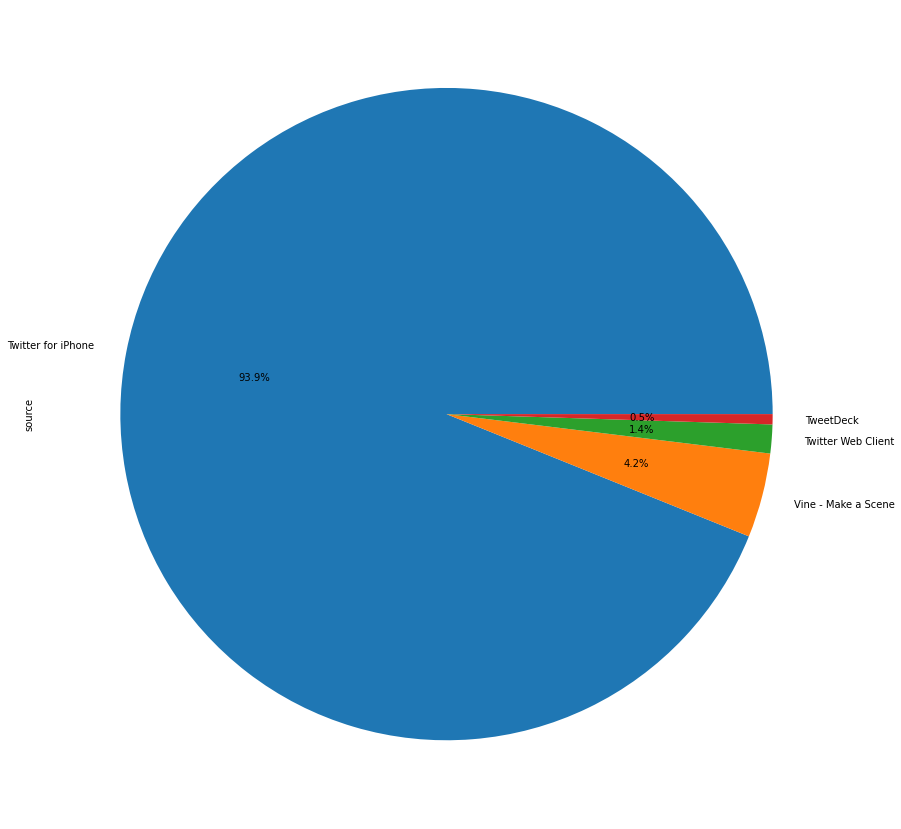

In [102]:
#this code results a pie chart that compares the sources used for tweets
master_df['source'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize = (30,15))

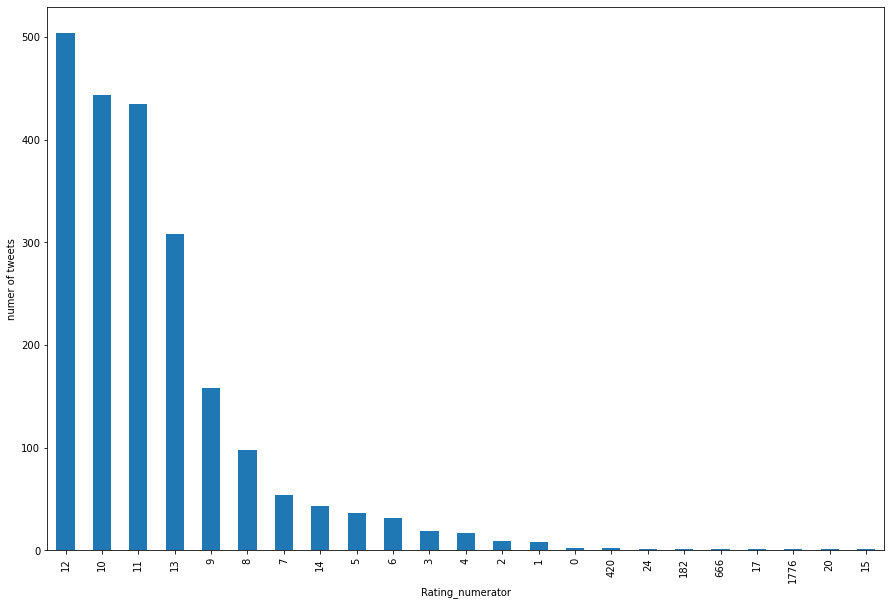

In [103]:
#this code results a bar chart that consist of the numerator distribution 
fig, ax = plt.subplots()
master_df['rating_numerator'].value_counts().plot(kind='bar', figsize = (15,10))
ax.set_xlabel('Rating_numerator');
ax.set_ylabel('numer of tweets');

<AxesSubplot:ylabel='img_num'>

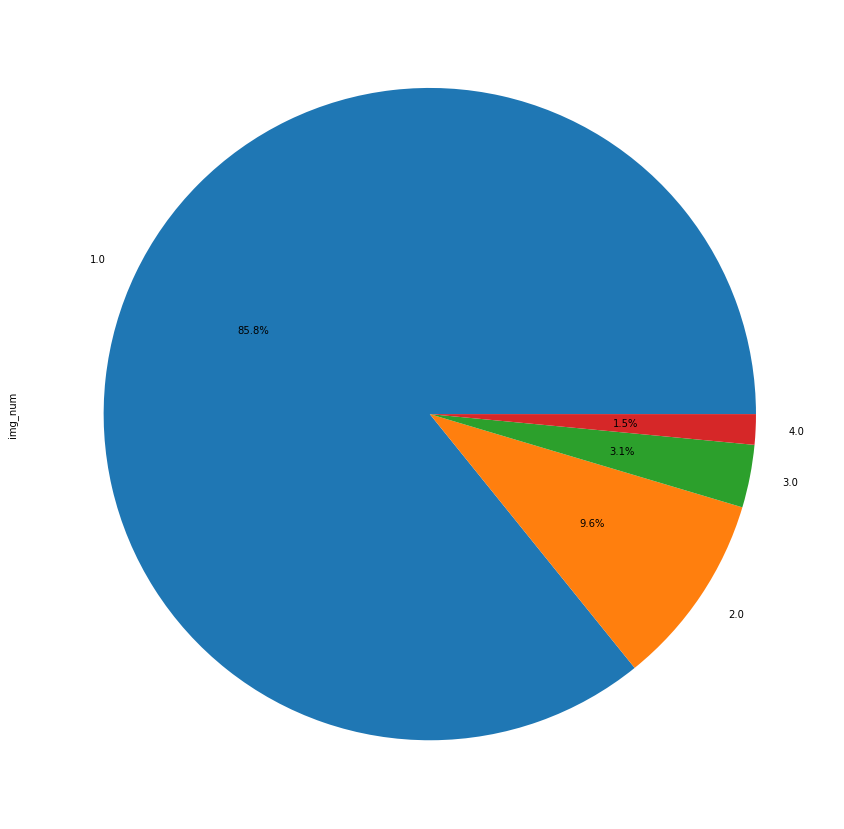

In [104]:
#this code explores the number of images per tweets, most of the tweets contain single image
master_df['img_num'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize = (30,15))